In [2]:
import numpy as np

from linear_regression import LinearRegression as MyLinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import train_test_split

from sklearn.datasets import make_regression

from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
RANDOM_STATE = 42

Сгенерируем данные для регрессии:

In [4]:
n_samples = 1000
n_outliers = 50

X, y, coef = make_regression(
    n_samples=n_samples, n_features=1,
    n_informative=1, noise=10,
    coef=True, random_state=RANDOM_STATE
)

# Add outlier data
np.random.seed(RANDOM_STATE)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

Разобьем данные на тренировочную и обучающую выборки:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=RANDOM_STATE
)

Посмотрим на данные:

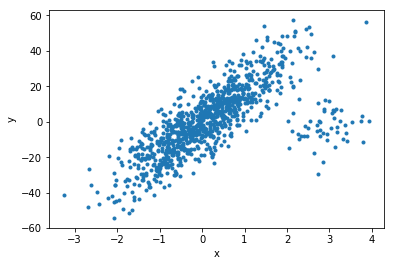

In [6]:
plt.plot(X, y, ".");
plt.xlabel("x");
plt.ylabel("y");

Обучим линейную модель и обучим ее на тренировочных данных:Ъ

In [7]:
linear_regression_model = LinearRegression()

linear_regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Сделаем предикт на тестовых данных:

In [8]:
y_hat = linear_regression_model.predict(X_test)

Посмотрим на значения метрик:

In [9]:
print("MAE:", mean_absolute_error(y_test, y_hat))
print("MSE:", mean_squared_error(y_test, y_hat))
print("R^2 score:", r2_score(y_test, y_hat))

MAE: 9.940362029807721
MSE: 173.1929838913916
R^2 score: 0.47263462857304817


Посмотрим на веса обученной модели:

In [10]:
print(linear_regression_model.coef_)
print(linear_regression_model.intercept_)

[11.3272569]
-1.3555932515073652


Визуализируем:

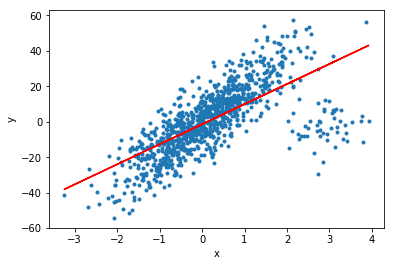

In [11]:
plt.plot(X, y, ".");
plt.plot(X, X * linear_regression_model.coef_ + linear_regression_model.intercept_, "r")
plt.xlabel("x");
plt.ylabel("y");

---

In [ ]:
# TODO: выполните то же самое с написанной вами моделью:
# 1. обучите ее на (X_train, y_train)
#   * попробуйте обучать с регуляризацией и без
#   * пробуйте различные гиперпараметры (шаг градиента, коэффицент регуляризации)
# 2. оцените кач-во на X_test, используя все написанные вами метрики
# 3. сравните значения метрик с значениями метрик из sklearn.metrics
# 4. визуализируйте y = k * x + b, где k и b -- bias и вес вашей модели

In [25]:
test = MyLinearRegression(lambda_coef=0.0001)
test.fit(X_train, y_train.reshape(-1, 1))

In [26]:
test.get_weights()

array([[-1.35559325],
       [11.3272569 ]])

In [43]:
m1 = metrics.mse(y_train.reshape(-1, 1), test.get_weights()[1, 0]*X_train + test.get_weights()[0, 0])
print(m1)

188.10564599029792


In [44]:
m2 = metrics.mae(y_train.reshape(-1, 1), test.get_weights()[1, 0]*X_train + test.get_weights()[0, 0])
print(m2)

10.244262988473682


In [45]:
m3 = metrics.r2_score(y_train.reshape(-1, 1), test.get_weights()[1, 0]*X_train + test.get_weights()[0, 0])
print(m3)

0.47265992203386376


Text(0.5, 1.0, 'MSE: 188.10564599029792, MAE: 10.244262988473682, R^2: 0.47265992203386376')

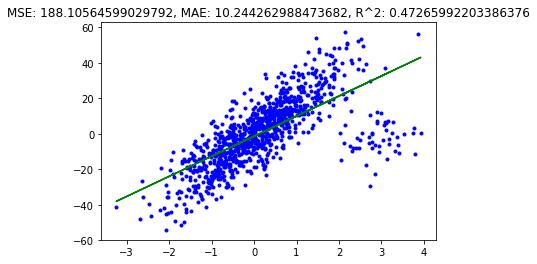

In [46]:
plt.plot(X, y, 'b.')
plt.plot(X, test.get_weights()[1, 0]*X + test.get_weights()[0, 0], 'g-')
plt.title("MSE: {}, MAE: {}, R^2: {}".format(m1, m2, m3))